## Task 1
Import libraries

In [ ]:
#import relevant libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.utils import to_categorical

## Task 2
Load dataset using keras API

Dataset must be pre-processed before training the network, if you check image in the training, you will see pixel value range from 0 to 255, scale these values range from 0 to 1. [note it is important that both training and testing dataset pre-processed same way].

In [ ]:
#loading the mnist dataset using keras API

mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
# Checking the structure of mnist dataset.
print(mnist)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [ ]:
#Assigning images to test and train
(X_train, y_train), (X_test, y_test) = mnist

In [ ]:
#Checking the shape of X_train (training dataset of pictures)

X_train.shape

(60000, 28, 28)

In [ ]:
#Checking the shape of y_train (class numbers of training dataset)

y_train.shape

(60000,)

In [ ]:
#Checking the shape of X_test (testing dataset of pictures)

X_test.shape

(10000, 28, 28)

In [ ]:
#Checking the shape of y_test(class numbers of testing dataset)

y_test.shape

(10000,)

class number example : 5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 2

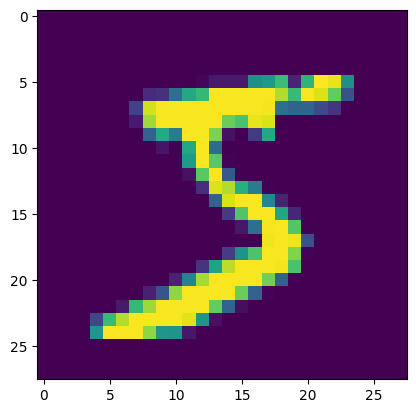

In [ ]:
#Summary, showing image

#Tells us which number the first array is
print("class number example :", y_train[0])

#Shows us the first array
print(X_train[0])

#Plots what the array looks like
plt.imshow(X_train[0])

In [ ]:
#Normalizing the data by dividing with 255.0
x_train = X_train/ 255.0
x_test = X_test / 255.0

print(X_train[0].shape[0] * X_train[0].shape[1])

'''
Grey scale images have pixel values from 0 to 255, which represents the intensities of the pixels.
Dividing the values by 255 can help us make the pixels into the same magnitude.
Normalization was applied here, rather than standardization, since normalization is the usual choice for image dataset.
'''

784


'\nGrey scale images have pixel values from 0 to 255, which represents the intensities of the pixels.\nDividing the values by 255 can help us make the pixels into the same magnitude.\nNormalization was applied here, rather than standardization, since normalization is the usual choice for image dataset.\n'

In [ ]:
#Checking what x_train looks like after normalization
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# **Benchmark**

## Task 3: Build a Classifier using MLP
The layer is the most fundamental component of a neural network. Data is put into layers, and they extract representations from it. Choose the number of stacking layers so that model representations should, be useful for the given task.

In [ ]:
#Creating the neural network for the classifier model

#Random seed with key 42 was established for reproducibility.
tf.random.set_seed(42)

#Creating a sequential model using Keras. Sequential model linearly stacks layers one after another.
model = tf.keras.Sequential()

#Adding the input later of the network and indicating that the shape of the data is 28,28/
model.add(tf.keras.layers.Input(shape=[28,28]))

#Flattening the 28,28 2D input into a 1D array of 784.
#The next layer is expecting to receive a 1D array, which is why we need to do this step.
model.add(tf.keras.layers.Flatten())

#Creating 2 dense hidden layers of 128, and using the ReLu activation.
#ReLu was used due to its non-linearity properties and efficiency.
#input shape 784 was from multiplying 28 and 28.
model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))

#Creating a droupout layer to help prevent overfitting
#Dropout 0.25 means that we are dropping out 25% of our input units randomly.
model.add(tf.keras.layers.Dropout(0.25))

#Creating the final output layer, which classifies the images from 0 to 9.
#Softmax activation is used for multiclass classfication and as the output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

'''
The parameters above were chosen by replicating the clothes classification model.
This notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.
'''

'\nThe parameters above were chosen by replicating the clothes classification model.\nThis notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.\n'

In [ ]:
#Showing a summary of the model created.
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_47 (Dense)            (None, 128)               100480    
                                                                 
 dense_48 (Dense)            (None, 128)               16512     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 4: Compile the Model
A few more parameters are required before the model can be used for training.

These are added at the build step of the model: Choose these parameters.

Loss function

Optimizer

Metrics

In [ ]:
#Compiling the model by configuring the loss, optimizer, and metrics paramters.
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics=['accuracy'])

#Trying Categorical Crossentropy since this is multi-class classification and the data is encoded. The loss is also on a Logarithmic scale, so the model penalizes confident but incorrect predictions more heavily.
#adam is an extension of SGD and is designed to overcome the limitations of sgd.
# Accuracy was used as a metric to evaluate the model's success.

## Task 5: Train and Test the model.
a. Feed the training data to the built model.

b. Ask model to make predictions about a test set.

c. Verify that the predictions match the labels from the test labels.

In [ ]:
#Training the model with 20 epochs.
#20 epochs will be used across all notebooks for the MNIST dataset for uniformity.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=512)

#A mini batch was selected to make the training less computationally expensive. A batch size of 512 means that we are processing 512 examples from the training dataset.

Epoch 1/20
118/118 [==============================] - 2s 15ms/step - loss: 0.6205 - accuracy: 0.8162 - val_loss: 0.2292 - val_accuracy: 0.9336
Epoch 2/20
118/118 [==============================] - 1s 12ms/step - loss: 0.2232 - accuracy: 0.9349 - val_loss: 0.1558 - val_accuracy: 0.9532
Epoch 3/20
118/118 [==============================] - 2s 13ms/step - loss: 0.1635 - accuracy: 0.9528 - val_loss: 0.1285 - val_accuracy: 0.9600
Epoch 4/20
118/118 [==============================] - 2s 20ms/step - loss: 0.1293 - accuracy: 0.9621 - val_loss: 0.1088 - val_accuracy: 0.9669
Epoch 5/20
118/118 [==============================] - 2s 15ms/step - loss: 0.1053 - accuracy: 0.9682 - val_loss: 0.1005 - val_accuracy: 0.9689
Epoch 6/20
118/118 [==============================] - 2s 13ms/step - loss: 0.0893 - accuracy: 0.9736 - val_loss: 0.0904 - val_accuracy: 0.9721
Epoch 7/20
118/118 [==============================] - 2s 13ms/step - loss: 0.0764 - accuracy: 0.9772 - val_loss: 0.0833 - val_accuracy: 0.9737

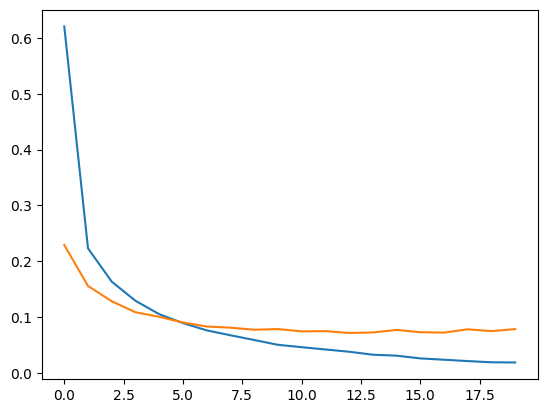

In [ ]:
#Visualising the training loss and validation loss of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#We can see that around 5 epochs, the test and validation losses were around the same.

In [ ]:
#Evaluating the test loss and accuracy of the model.
model.evaluate(x_test, y_test)

#The decrease of neurons in the second layer seemed to slightly improve loss and slightly decrease accuracy.

313/313 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9769


[0.0785432830452919, 0.9768999814987183]

# **Test 1: Decrease Neurons in Second Layer**

Second layer neurons from 128 to 100

## Task 3: Build a Classifier using MLP
The layer is the most fundamental component of a neural network. Data is put into layers, and they extract representations from it. Choose the number of stacking layers so that model representations should, be useful for the given task.

In [ ]:
#Creating the neural network for the classifier model

#Random seed with key 42 was established for reproducibility.
tf.random.set_seed(42)

#Creating a sequential model using Keras. Sequential model linearly stacks layers one after another.
model = tf.keras.Sequential()

#Adding the input later of the network and indicating that the shape of the data is 28,28/
model.add(tf.keras.layers.Input(shape=[28,28]))

#Flattening the 28,28 2D input into a 1D array of 784.
#The next layer is expecting to receive a 1D array, which is why we need to do this step.
model.add(tf.keras.layers.Flatten())

#Creating 2 dense hidden layers of 128, and using the ReLu activation.
#ReLu was used due to its non-linearity properties and efficiency.
#input shape 784 was from multiplying 28 and 28.
model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(100, activation="relu"))

#Creating a droupout layer to help prevent overfitting
#Dropout 0.25 means that we are dropping out 25% of our input units randomly.
model.add(tf.keras.layers.Dropout(0.25))

#Creating the final output layer, which classifies the images from 0 to 9.
#Softmax activation is used for multiclass classfication and as the output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

'''
The parameters above were chosen by replicating the clothes classification model.
This notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.
'''

'\nThe parameters above were chosen by replicating the clothes classification model.\nThis notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.\n'

In [ ]:
#Showing a summary of the model created.
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 100)               12900     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 114390 (446.84 KB)
Trainable params: 114390 (446.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 4: Compile the Model
A few more parameters are required before the model can be used for training.

These are added at the build step of the model: Choose these parameters.

Loss function

Optimizer

Metrics

In [ ]:
#Compiling the model by configuring the loss, optimizer, and metrics paramters.
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics=['accuracy'])

#Trying Categorical Crossentropy since this is multi-class classification and the data is encoded. The loss is also on a Logarithmic scale, so the model penalizes confident but incorrect predictions more heavily.
#adam is an extension of SGD and is designed to overcome the limitations of sgd.
# Accuracy was used as a metric to evaluate the model's success.

## Task 5: Train and Test the model.
a. Feed the training data to the built model.

b. Ask model to make predictions about a test set.

c. Verify that the predictions match the labels from the test labels.

In [ ]:
#Training the model with 20 epochs.
#20 epochs will be used across all notebooks for the MNIST dataset for uniformity.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=512)

#A mini batch was selected to make the training less computationally expensive. A batch size of 512 means that we are processing 512 examples from the training dataset.

Epoch 1/20
118/118 [==============================] - 2s 14ms/step - loss: 0.6389 - accuracy: 0.8126 - val_loss: 0.2315 - val_accuracy: 0.9335
Epoch 2/20
118/118 [==============================] - 1s 12ms/step - loss: 0.2329 - accuracy: 0.9320 - val_loss: 0.1595 - val_accuracy: 0.9541
Epoch 3/20
118/118 [==============================] - 1s 12ms/step - loss: 0.1727 - accuracy: 0.9503 - val_loss: 0.1341 - val_accuracy: 0.9594
Epoch 4/20
118/118 [==============================] - 1s 12ms/step - loss: 0.1397 - accuracy: 0.9586 - val_loss: 0.1140 - val_accuracy: 0.9650
Epoch 5/20
118/118 [==============================] - 1s 12ms/step - loss: 0.1172 - accuracy: 0.9649 - val_loss: 0.0989 - val_accuracy: 0.9688
Epoch 6/20
118/118 [==============================] - 1s 12ms/step - loss: 0.0975 - accuracy: 0.9715 - val_loss: 0.0913 - val_accuracy: 0.9708
Epoch 7/20
118/118 [==============================] - 2s 19ms/step - loss: 0.0841 - accuracy: 0.9755 - val_loss: 0.0822 - val_accuracy: 0.9735

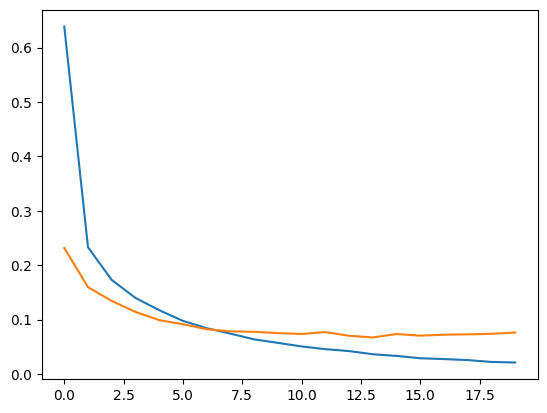

In [ ]:
#Visualising the training loss and validation loss of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#We can see that around 5 epochs, the test and validation losses were around the same.

In [ ]:
#Evaluating the test loss and accuracy of the model.
model.evaluate(x_test, y_test)

#The decrease of neurons in the second layer seemed to slightly improve loss and slightly decrease accuracy.

313/313 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9781


[0.07605244964361191, 0.9781000018119812]

# **Test 2: Increase Neurons in Second Layer**

Second layer neurons from 128 to 156

## Task 3: Build a Classifier using MLP
The layer is the most fundamental component of a neural network. Data is put into layers, and they extract representations from it. Choose the number of stacking layers so that model representations should, be useful for the given task.

In [ ]:
#Creating the neural network for the classifier model

#Random seed with key 42 was established for reproducibility.
tf.random.set_seed(42)

#Creating a sequential model using Keras. Sequential model linearly stacks layers one after another.
model = tf.keras.Sequential()

#Adding the input later of the network and indicating that the shape of the data is 28,28/
model.add(tf.keras.layers.Input(shape=[28,28]))

#Flattening the 28,28 2D input into a 1D array of 784.
#The next layer is expecting to receive a 1D array, which is why we need to do this step.
model.add(tf.keras.layers.Flatten())

#Creating 2 dense hidden layers of 128, and using the ReLu activation.
#ReLu was used due to its non-linearity properties and efficiency.
#input shape 784 was from multiplying 28 and 28.
model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(156, activation="relu"))

#Creating a droupout layer to help prevent overfitting
#Dropout 0.25 means that we are dropping out 25% of our input units randomly.
model.add(tf.keras.layers.Dropout(0.25))

#Creating the final output layer, which classifies the images from 0 to 9.
#Softmax activation is used for multiclass classfication and as the output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

'''
The parameters above were chosen by replicating the clothes classification model.
This notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.
'''

'\nThe parameters above were chosen by replicating the clothes classification model.\nThis notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.\n'

In [ ]:
#Showing a summary of the model created.
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 156)               20124     
                                                                 
 dropout_6 (Dropout)         (None, 156)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                1570      
                                                                 
Total params: 122174 (477.24 KB)
Trainable params: 122174 (477.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 4: Compile the Model
A few more parameters are required before the model can be used for training.

These are added at the build step of the model: Choose these parameters.

Loss function

Optimizer

Metrics

In [ ]:
#Compiling the model by configuring the loss, optimizer, and metrics paramters.
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics=['accuracy'])

#Trying Categorical Crossentropy since this is multi-class classification and the data is encoded. The loss is also on a Logarithmic scale, so the model penalizes confident but incorrect predictions more heavily.
#adam is an extension of SGD and is designed to overcome the limitations of sgd.
# Accuracy was used as a metric to evaluate the model's success.

## Task 5: Train and Test the model.
a. Feed the training data to the built model.

b. Ask model to make predictions about a test set.

c. Verify that the predictions match the labels from the test labels.

In [ ]:
#Training the model with 20 epochs.
#20 epochs will be used across all notebooks for the MNIST dataset for uniformity.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=512)

#A mini batch was selected to make the training less computationally expensive. A batch size of 512 means that we are processing 512 examples from the training dataset.

Epoch 1/20
118/118 [==============================] - 3s 22ms/step - loss: 0.5966 - accuracy: 0.8269 - val_loss: 0.2288 - val_accuracy: 0.9345
Epoch 2/20
118/118 [==============================] - 2s 14ms/step - loss: 0.2170 - accuracy: 0.9366 - val_loss: 0.1532 - val_accuracy: 0.9544
Epoch 3/20
118/118 [==============================] - 2s 13ms/step - loss: 0.1553 - accuracy: 0.9544 - val_loss: 0.1225 - val_accuracy: 0.9630
Epoch 4/20
118/118 [==============================] - 2s 13ms/step - loss: 0.1204 - accuracy: 0.9646 - val_loss: 0.1027 - val_accuracy: 0.9693
Epoch 5/20
118/118 [==============================] - 2s 13ms/step - loss: 0.0981 - accuracy: 0.9708 - val_loss: 0.0917 - val_accuracy: 0.9716
Epoch 6/20
118/118 [==============================] - 2s 13ms/step - loss: 0.0809 - accuracy: 0.9760 - val_loss: 0.0812 - val_accuracy: 0.9755
Epoch 7/20
118/118 [==============================] - 3s 24ms/step - loss: 0.0697 - accuracy: 0.9794 - val_loss: 0.0794 - val_accuracy: 0.9757

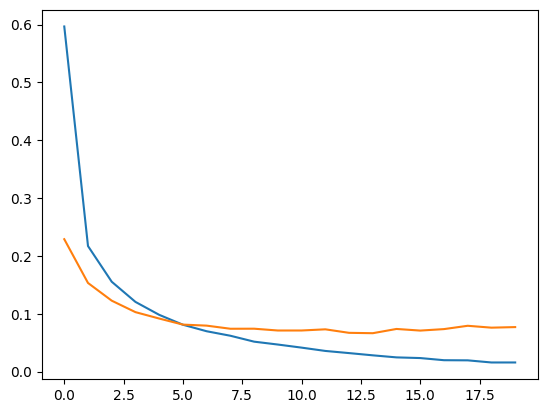

In [ ]:
#Visualising the training loss and validation loss of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#We can see that around 5 epochs, the test and validation losses were around the same.

In [ ]:
#Evaluating the test loss and accuracy of the model.
model.evaluate(x_test, y_test)

#The increase of neurons in the second layer seemed to slightly decreased accuracy and increased loss.

313/313 [==============================] - 1s 3ms/step - loss: 0.0769 - accuracy: 0.9787


[0.07686794549226761, 0.9786999821662903]

# **Test 3: Increase Neurons in First Layer**

First layer neurons from 128 to 156

## Task 3: Build a Classifier using MLP
The layer is the most fundamental component of a neural network. Data is put into layers, and they extract representations from it. Choose the number of stacking layers so that model representations should, be useful for the given task.

In [ ]:
#Creating the neural network for the classifier model

#Random seed with key 42 was established for reproducibility.
tf.random.set_seed(42)

#Creating a sequential model using Keras. Sequential model linearly stacks layers one after another.
model = tf.keras.Sequential()

#Adding the input later of the network and indicating that the shape of the data is 28,28/
model.add(tf.keras.layers.Input(shape=[28,28]))

#Flattening the 28,28 2D input into a 1D array of 784.
#The next layer is expecting to receive a 1D array, which is why we need to do this step.
model.add(tf.keras.layers.Flatten())

#Creating 2 dense hidden layers of 128, and using the ReLu activation.
#ReLu was used due to its non-linearity properties and efficiency.
#input shape 784 was from multiplying 28 and 28.
model.add(tf.keras.layers.Dense(156, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))

#Creating a droupout layer to help prevent overfitting
#Dropout 0.25 means that we are dropping out 25% of our input units randomly.
model.add(tf.keras.layers.Dropout(0.25))

#Creating the final output layer, which classifies the images from 0 to 9.
#Softmax activation is used for multiclass classfication and as the output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

'''
The parameters above were chosen by replicating the clothes classification model.
This notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.
'''

'\nThe parameters above were chosen by replicating the clothes classification model.\nThis notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.\n'

In [ ]:
#Showing a summary of the model created.
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 156)               122460    
                                                                 
 dense_22 (Dense)            (None, 128)               20096     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 143846 (561.90 KB)
Trainable params: 143846 (561.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 4: Compile the Model
A few more parameters are required before the model can be used for training.

These are added at the build step of the model: Choose these parameters.

Loss function

Optimizer

Metrics

In [ ]:
#Compiling the model by configuring the loss, optimizer, and metrics paramters.
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics=['accuracy'])

#Trying Categorical Crossentropy since this is multi-class classification and the data is encoded. The loss is also on a Logarithmic scale, so the model penalizes confident but incorrect predictions more heavily.
#adam is an extension of SGD and is designed to overcome the limitations of sgd.
# Accuracy was used as a metric to evaluate the model's success.

## Task 5: Train and Test the model.
a. Feed the training data to the built model.

b. Ask model to make predictions about a test set.

c. Verify that the predictions match the labels from the test labels.

In [ ]:
#Training the model with 20 epochs.
#20 epochs will be used across all notebooks for the MNIST dataset for uniformity.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=512)

#A mini batch was selected to make the training less computationally expensive. A batch size of 512 means that we are processing 512 examples from the training dataset.

Epoch 1/20
118/118 [==============================] - 5s 23ms/step - loss: 0.5751 - accuracy: 0.8297 - val_loss: 0.2182 - val_accuracy: 0.9342
Epoch 2/20
118/118 [==============================] - 2s 17ms/step - loss: 0.2114 - accuracy: 0.9388 - val_loss: 0.1513 - val_accuracy: 0.9544
Epoch 3/20
118/118 [==============================] - 2s 14ms/step - loss: 0.1529 - accuracy: 0.9551 - val_loss: 0.1248 - val_accuracy: 0.9603
Epoch 4/20
118/118 [==============================] - 2s 18ms/step - loss: 0.1219 - accuracy: 0.9642 - val_loss: 0.1032 - val_accuracy: 0.9675
Epoch 5/20
118/118 [==============================] - 2s 19ms/step - loss: 0.1003 - accuracy: 0.9703 - val_loss: 0.0968 - val_accuracy: 0.9709
Epoch 6/20
118/118 [==============================] - 3s 27ms/step - loss: 0.0836 - accuracy: 0.9749 - val_loss: 0.0850 - val_accuracy: 0.9737
Epoch 7/20
118/118 [==============================] - 3s 23ms/step - loss: 0.0709 - accuracy: 0.9788 - val_loss: 0.0825 - val_accuracy: 0.9748

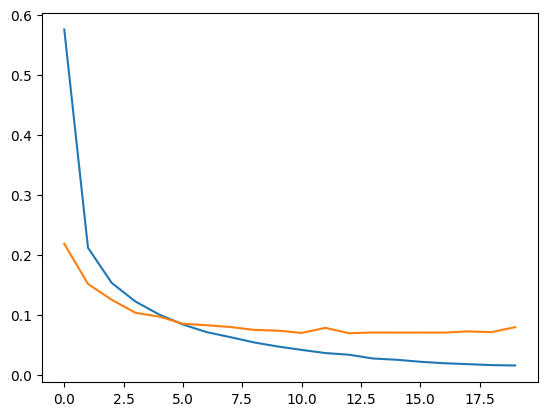

In [ ]:
#Visualising the training loss and validation loss of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#We can see that around 5 epochs, the test and validation losses were around the same.

In [ ]:
#Evaluating the test loss and accuracy of the model.
model.evaluate(x_test, y_test)

#The increase of neurons in the second layer seemed to slightly decreased accuracy and increased loss.

313/313 [==============================] - 1s 3ms/step - loss: 0.0792 - accuracy: 0.9776


[0.07918824255466461, 0.9775999784469604]

# **Test 4: Decrease Neurons in First Layer**

First layer neurons from 128 to 100

## Task 3: Build a Classifier using MLP
The layer is the most fundamental component of a neural network. Data is put into layers, and they extract representations from it. Choose the number of stacking layers so that model representations should, be useful for the given task.

In [ ]:
#Creating the neural network for the classifier model

#Random seed with key 42 was established for reproducibility.
tf.random.set_seed(42)

#Creating a sequential model using Keras. Sequential model linearly stacks layers one after another.
model = tf.keras.Sequential()

#Adding the input later of the network and indicating that the shape of the data is 28,28/
model.add(tf.keras.layers.Input(shape=[28,28]))

#Flattening the 28,28 2D input into a 1D array of 784.
#The next layer is expecting to receive a 1D array, which is why we need to do this step.
model.add(tf.keras.layers.Flatten())

#Creating 2 dense hidden layers of 128, and using the ReLu activation.
#ReLu was used due to its non-linearity properties and efficiency.
#input shape 784 was from multiplying 28 and 28.
model.add(tf.keras.layers.Dense(100, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))

#Creating a droupout layer to help prevent overfitting
#Dropout 0.25 means that we are dropping out 25% of our input units randomly.
model.add(tf.keras.layers.Dropout(0.25))

#Creating the final output layer, which classifies the images from 0 to 9.
#Softmax activation is used for multiclass classfication and as the output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

'''
The parameters above were chosen by replicating the clothes classification model.
This notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.
'''

'\nThe parameters above were chosen by replicating the clothes classification model.\nThis notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.\n'

In [ ]:
#Showing a summary of the model created.
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 100)               78500     
                                                                 
 dense_25 (Dense)            (None, 128)               12928     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 92718 (362.18 KB)
Trainable params: 92718 (362.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 4: Compile the Model
A few more parameters are required before the model can be used for training.

These are added at the build step of the model: Choose these parameters.

Loss function

Optimizer

Metrics

In [ ]:
#Compiling the model by configuring the loss, optimizer, and metrics paramters.
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics=['accuracy'])

#Trying Categorical Crossentropy since this is multi-class classification and the data is encoded. The loss is also on a Logarithmic scale, so the model penalizes confident but incorrect predictions more heavily.
#adam is an extension of SGD and is designed to overcome the limitations of sgd.
# Accuracy was used as a metric to evaluate the model's success.

## Task 5: Train and Test the model.
a. Feed the training data to the built model.

b. Ask model to make predictions about a test set.

c. Verify that the predictions match the labels from the test labels.

In [ ]:
#Training the model with 20 epochs.
#20 epochs will be used across all notebooks for the MNIST dataset for uniformity.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=512)

#A mini batch was selected to make the training less computationally expensive. A batch size of 512 means that we are processing 512 examples from the training dataset.

Epoch 1/20
118/118 [==============================] - 3s 20ms/step - loss: 0.6518 - accuracy: 0.8055 - val_loss: 0.2550 - val_accuracy: 0.9268
Epoch 2/20
118/118 [==============================] - 2s 15ms/step - loss: 0.2464 - accuracy: 0.9282 - val_loss: 0.1747 - val_accuracy: 0.9479
Epoch 3/20
118/118 [==============================] - 1s 12ms/step - loss: 0.1822 - accuracy: 0.9465 - val_loss: 0.1405 - val_accuracy: 0.9581
Epoch 4/20
118/118 [==============================] - 1s 11ms/step - loss: 0.1459 - accuracy: 0.9566 - val_loss: 0.1172 - val_accuracy: 0.9639
Epoch 5/20
118/118 [==============================] - 1s 12ms/step - loss: 0.1195 - accuracy: 0.9647 - val_loss: 0.1035 - val_accuracy: 0.9675
Epoch 6/20
118/118 [==============================] - 1s 12ms/step - loss: 0.1010 - accuracy: 0.9703 - val_loss: 0.0901 - val_accuracy: 0.9734
Epoch 7/20
118/118 [==============================] - 1s 12ms/step - loss: 0.0877 - accuracy: 0.9748 - val_loss: 0.0853 - val_accuracy: 0.9745

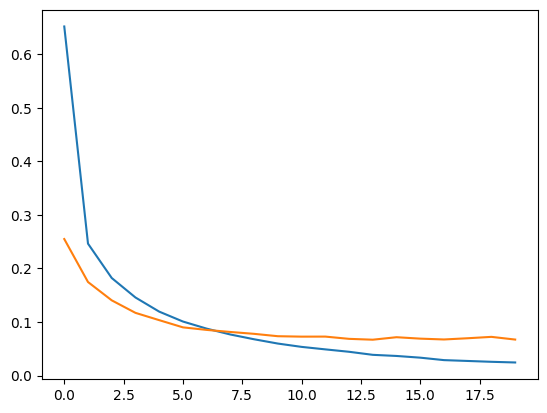

In [ ]:
#Visualising the training loss and validation loss of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#We can see that around 5 epochs, the test and validation losses were around the same.

In [ ]:
#Evaluating the test loss and accuracy of the model.
model.evaluate(x_test, y_test)

#The increase of neurons in the second layer seemed to slightly decreased accuracy and increased loss.

313/313 [==============================] - 1s 2ms/step - loss: 0.0673 - accuracy: 0.9795


[0.06731095165014267, 0.9794999957084656]

# **Test 5: Increase Neurons in First and Second Layers**

Neurons from 128 to 156

## Task 3: Build a Classifier using MLP
The layer is the most fundamental component of a neural network. Data is put into layers, and they extract representations from it. Choose the number of stacking layers so that model representations should, be useful for the given task.

In [ ]:
#Creating the neural network for the classifier model

#Random seed with key 42 was established for reproducibility.
tf.random.set_seed(42)

#Creating a sequential model using Keras. Sequential model linearly stacks layers one after another.
model = tf.keras.Sequential()

#Adding the input later of the network and indicating that the shape of the data is 28,28/
model.add(tf.keras.layers.Input(shape=[28,28]))

#Flattening the 28,28 2D input into a 1D array of 784.
#The next layer is expecting to receive a 1D array, which is why we need to do this step.
model.add(tf.keras.layers.Flatten())

#Creating 2 dense hidden layers of 128, and using the ReLu activation.
#ReLu was used due to its non-linearity properties and efficiency.
#input shape 784 was from multiplying 28 and 28.
model.add(tf.keras.layers.Dense(156, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(156, activation="relu"))

#Creating a droupout layer to help prevent overfitting
#Dropout 0.25 means that we are dropping out 25% of our input units randomly.
model.add(tf.keras.layers.Dropout(0.25))

#Creating the final output layer, which classifies the images from 0 to 9.
#Softmax activation is used for multiclass classfication and as the output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

'''
The parameters above were chosen by replicating the clothes classification model.
This notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.
'''

'\nThe parameters above were chosen by replicating the clothes classification model.\nThis notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.\n'

In [ ]:
#Showing a summary of the model created.
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 156)               122460    
                                                                 
 dense_28 (Dense)            (None, 156)               24492     
                                                                 
 dropout_9 (Dropout)         (None, 156)               0         
                                                                 
 dense_29 (Dense)            (None, 10)                1570      
                                                                 
Total params: 148522 (580.16 KB)
Trainable params: 148522 (580.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 4: Compile the Model
A few more parameters are required before the model can be used for training.

These are added at the build step of the model: Choose these parameters.

Loss function

Optimizer

Metrics

In [ ]:
#Compiling the model by configuring the loss, optimizer, and metrics paramters.
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics=['accuracy'])

#Trying Categorical Crossentropy since this is multi-class classification and the data is encoded. The loss is also on a Logarithmic scale, so the model penalizes confident but incorrect predictions more heavily.
#adam is an extension of SGD and is designed to overcome the limitations of sgd.
# Accuracy was used as a metric to evaluate the model's success.

## Task 5: Train and Test the model.
a. Feed the training data to the built model.

b. Ask model to make predictions about a test set.

c. Verify that the predictions match the labels from the test labels.

In [ ]:
#Training the model with 20 epochs.
#20 epochs will be used across all notebooks for the MNIST dataset for uniformity.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=512)

#A mini batch was selected to make the training less computationally expensive. A batch size of 512 means that we are processing 512 examples from the training dataset.

Epoch 1/20
118/118 [==============================] - 3s 17ms/step - loss: 0.5550 - accuracy: 0.8424 - val_loss: 0.2135 - val_accuracy: 0.9382
Epoch 2/20
118/118 [==============================] - 2s 17ms/step - loss: 0.2025 - accuracy: 0.9410 - val_loss: 0.1459 - val_accuracy: 0.9571
Epoch 3/20
118/118 [==============================] - 2s 15ms/step - loss: 0.1438 - accuracy: 0.9580 - val_loss: 0.1166 - val_accuracy: 0.9648
Epoch 4/20
118/118 [==============================] - 2s 18ms/step - loss: 0.1125 - accuracy: 0.9669 - val_loss: 0.1027 - val_accuracy: 0.9699
Epoch 5/20
118/118 [==============================] - 3s 21ms/step - loss: 0.0924 - accuracy: 0.9721 - val_loss: 0.0879 - val_accuracy: 0.9734
Epoch 6/20
118/118 [==============================] - 2s 14ms/step - loss: 0.0760 - accuracy: 0.9776 - val_loss: 0.0820 - val_accuracy: 0.9752
Epoch 7/20
118/118 [==============================] - 2s 15ms/step - loss: 0.0634 - accuracy: 0.9809 - val_loss: 0.0772 - val_accuracy: 0.9774

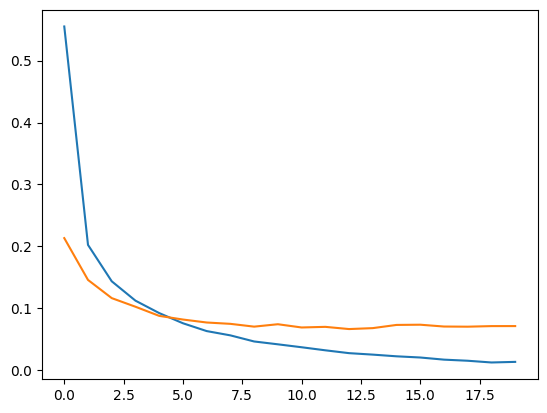

In [ ]:
#Visualising the training loss and validation loss of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#We can see that around 5 epochs, the test and validation losses were around the same.

In [ ]:
#Evaluating the test loss and accuracy of the model.
model.evaluate(x_test, y_test)

#The increase of neurons in the second layer seemed to slightly decreased accuracy and increased loss.

313/313 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9806


[0.07145833969116211, 0.9805999994277954]

# **Test 6: Increase Neurons in First Layer and Decrease Neurons in Second Layers**

First layer 128 to 156
Second layer 128 to 100

## Task 3: Build a Classifier using MLP
The layer is the most fundamental component of a neural network. Data is put into layers, and they extract representations from it. Choose the number of stacking layers so that model representations should, be useful for the given task.

In [ ]:
#Creating the neural network for the classifier model

#Random seed with key 42 was established for reproducibility.
tf.random.set_seed(42)

#Creating a sequential model using Keras. Sequential model linearly stacks layers one after another.
model = tf.keras.Sequential()

#Adding the input later of the network and indicating that the shape of the data is 28,28/
model.add(tf.keras.layers.Input(shape=[28,28]))

#Flattening the 28,28 2D input into a 1D array of 784.
#The next layer is expecting to receive a 1D array, which is why we need to do this step.
model.add(tf.keras.layers.Flatten())

#Creating 2 dense hidden layers of 128, and using the ReLu activation.
#ReLu was used due to its non-linearity properties and efficiency.
#input shape 784 was from multiplying 28 and 28.
model.add(tf.keras.layers.Dense(156, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(100, activation="relu"))

#Creating a droupout layer to help prevent overfitting
#Dropout 0.25 means that we are dropping out 25% of our input units randomly.
model.add(tf.keras.layers.Dropout(0.25))

#Creating the final output layer, which classifies the images from 0 to 9.
#Softmax activation is used for multiclass classfication and as the output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

'''
The parameters above were chosen by replicating the clothes classification model.
This notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.
'''

'\nThe parameters above were chosen by replicating the clothes classification model.\nThis notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.\n'

In [ ]:
#Showing a summary of the model created.
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 156)               122460    
                                                                 
 dense_31 (Dense)            (None, 100)               15700     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
Total params: 139170 (543.63 KB)
Trainable params: 139170 (543.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 4: Compile the Model
A few more parameters are required before the model can be used for training.

These are added at the build step of the model: Choose these parameters.

Loss function

Optimizer

Metrics

In [ ]:
#Compiling the model by configuring the loss, optimizer, and metrics paramters.
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics=['accuracy'])

#Trying Categorical Crossentropy since this is multi-class classification and the data is encoded. The loss is also on a Logarithmic scale, so the model penalizes confident but incorrect predictions more heavily.
#adam is an extension of SGD and is designed to overcome the limitations of sgd.
# Accuracy was used as a metric to evaluate the model's success.

## Task 5: Train and Test the model.
a. Feed the training data to the built model.

b. Ask model to make predictions about a test set.

c. Verify that the predictions match the labels from the test labels.

In [ ]:
#Training the model with 20 epochs.
#20 epochs will be used across all notebooks for the MNIST dataset for uniformity.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=512)

#A mini batch was selected to make the training less computationally expensive. A batch size of 512 means that we are processing 512 examples from the training dataset.

Epoch 1/20
118/118 [==============================] - 4s 30ms/step - loss: 0.5696 - accuracy: 0.8355 - val_loss: 0.2262 - val_accuracy: 0.9346
Epoch 2/20
118/118 [==============================] - 2s 19ms/step - loss: 0.2234 - accuracy: 0.9346 - val_loss: 0.1572 - val_accuracy: 0.9533
Epoch 3/20
118/118 [==============================] - 2s 14ms/step - loss: 0.1643 - accuracy: 0.9525 - val_loss: 0.1262 - val_accuracy: 0.9619
Epoch 4/20
118/118 [==============================] - 2s 14ms/step - loss: 0.1306 - accuracy: 0.9619 - val_loss: 0.1069 - val_accuracy: 0.9676
Epoch 5/20
118/118 [==============================] - 2s 13ms/step - loss: 0.1095 - accuracy: 0.9678 - val_loss: 0.0943 - val_accuracy: 0.9707
Epoch 6/20
118/118 [==============================] - 2s 13ms/step - loss: 0.0912 - accuracy: 0.9731 - val_loss: 0.0860 - val_accuracy: 0.9741
Epoch 7/20
118/118 [==============================] - 2s 13ms/step - loss: 0.0782 - accuracy: 0.9767 - val_loss: 0.0822 - val_accuracy: 0.9744

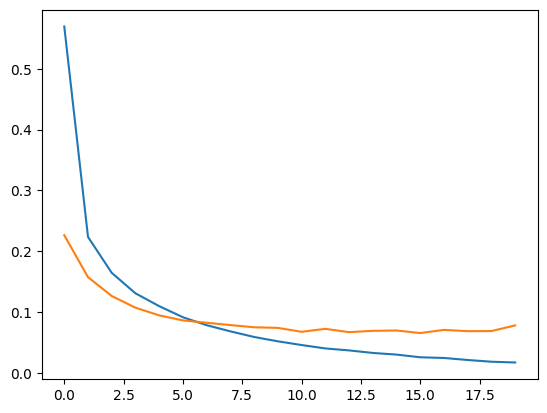

In [ ]:
#Visualising the training loss and validation loss of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#We can see that around 5 epochs, the test and validation losses were around the same.

In [ ]:
#Evaluating the test loss and accuracy of the model.
model.evaluate(x_test, y_test)

#The increase of neurons in the second layer seemed to slightly decreased accuracy and increased loss.

313/313 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9781


[0.07777629047632217, 0.9781000018119812]

# **Test 7: Increasing Dropout to 50%**

## Task 3: Build a Classifier using MLP
The layer is the most fundamental component of a neural network. Data is put into layers, and they extract representations from it. Choose the number of stacking layers so that model representations should, be useful for the given task.

In [ ]:
#Creating the neural network for the classifier model

#Random seed with key 42 was established for reproducibility.
tf.random.set_seed(42)

#Creating a sequential model using Keras. Sequential model linearly stacks layers one after another.
model = tf.keras.Sequential()

#Adding the input later of the network and indicating that the shape of the data is 28,28/
model.add(tf.keras.layers.Input(shape=[28,28]))

#Flattening the 28,28 2D input into a 1D array of 784.
#The next layer is expecting to receive a 1D array, which is why we need to do this step.
model.add(tf.keras.layers.Flatten())

#Creating 2 dense hidden layers of 128, and using the ReLu activation.
#ReLu was used due to its non-linearity properties and efficiency.
#input shape 784 was from multiplying 28 and 28.
model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))

#Creating a droupout layer to help prevent overfitting
#Dropout 0.25 means that we are dropping out 50% of our input units randomly.
model.add(tf.keras.layers.Dropout(0.50))

#Creating the final output layer, which classifies the images from 0 to 9.
#Softmax activation is used for multiclass classfication and as the output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

'''
The parameters above were chosen by replicating the clothes classification model.
This notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.
'''

'\nThe parameters above were chosen by replicating the clothes classification model.\nThis notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.\n'

In [ ]:
#Showing a summary of the model created.
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 128)               100480    
                                                                 
 dense_34 (Dense)            (None, 128)               16512     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 4: Compile the Model
A few more parameters are required before the model can be used for training.

These are added at the build step of the model: Choose these parameters.

Loss function

Optimizer

Metrics

In [ ]:
#Compiling the model by configuring the loss, optimizer, and metrics paramters.
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics=['accuracy'])

#Trying Categorical Crossentropy since this is multi-class classification and the data is encoded. The loss is also on a Logarithmic scale, so the model penalizes confident but incorrect predictions more heavily.
#adam is an extension of SGD and is designed to overcome the limitations of sgd.
# Accuracy was used as a metric to evaluate the model's success.

## Task 5: Train and Test the model.
a. Feed the training data to the built model.

b. Ask model to make predictions about a test set.

c. Verify that the predictions match the labels from the test labels.

In [ ]:
#Training the model with 20 epochs.
#20 epochs will be used across all notebooks for the MNIST dataset for uniformity.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=512)

#A mini batch was selected to make the training less computationally expensive. A batch size of 512 means that we are processing 512 examples from the training dataset.

Epoch 1/20
118/118 [==============================] - 3s 19ms/step - loss: 0.6715 - accuracy: 0.7970 - val_loss: 0.2419 - val_accuracy: 0.9287
Epoch 2/20
118/118 [==============================] - 2s 18ms/step - loss: 0.2645 - accuracy: 0.9232 - val_loss: 0.1660 - val_accuracy: 0.9512
Epoch 3/20
118/118 [==============================] - 2s 13ms/step - loss: 0.1945 - accuracy: 0.9441 - val_loss: 0.1370 - val_accuracy: 0.9583
Epoch 4/20
118/118 [==============================] - 1s 12ms/step - loss: 0.1550 - accuracy: 0.9552 - val_loss: 0.1133 - val_accuracy: 0.9642
Epoch 5/20
118/118 [==============================] - 1s 13ms/step - loss: 0.1297 - accuracy: 0.9624 - val_loss: 0.1031 - val_accuracy: 0.9674
Epoch 6/20
118/118 [==============================] - 1s 13ms/step - loss: 0.1124 - accuracy: 0.9676 - val_loss: 0.0941 - val_accuracy: 0.9722
Epoch 7/20
118/118 [==============================] - 1s 13ms/step - loss: 0.0975 - accuracy: 0.9712 - val_loss: 0.0877 - val_accuracy: 0.9736

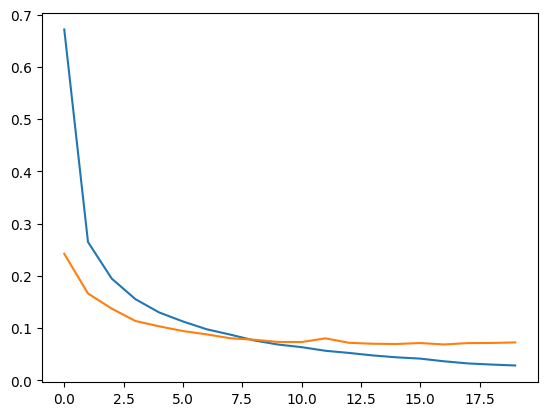

In [ ]:
#Visualising the training loss and validation loss of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#We can see that around 5 epochs, the test and validation losses were around the same.

In [ ]:
#Evaluating the test loss and accuracy of the model.
model.evaluate(x_test, y_test)

#The increase of neurons in the second layer seemed to slightly decreased accuracy and increased loss.

313/313 [==============================] - 1s 3ms/step - loss: 0.0723 - accuracy: 0.9795


[0.07228115200996399, 0.9794999957084656]

# **Test 8: Increasing Dropout to 50% and increasing neurons to 156 on both layers**

## Task 3: Build a Classifier using MLP
The layer is the most fundamental component of a neural network. Data is put into layers, and they extract representations from it. Choose the number of stacking layers so that model representations should, be useful for the given task.

In [ ]:
#Creating the neural network for the classifier model

#Random seed with key 42 was established for reproducibility.
tf.random.set_seed(42)

#Creating a sequential model using Keras. Sequential model linearly stacks layers one after another.
model = tf.keras.Sequential()

#Adding the input later of the network and indicating that the shape of the data is 28,28/
model.add(tf.keras.layers.Input(shape=[28,28]))

#Flattening the 28,28 2D input into a 1D array of 784.
#The next layer is expecting to receive a 1D array, which is why we need to do this step.
model.add(tf.keras.layers.Flatten())

#Creating 2 dense hidden layers of 128, and using the ReLu activation.
#ReLu was used due to its non-linearity properties and efficiency.
#input shape 784 was from multiplying 28 and 28.
model.add(tf.keras.layers.Dense(156, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(156, activation="relu"))

#Creating a droupout layer to help prevent overfitting
#Dropout 0.25 means that we are dropping out 50% of our input units randomly.
model.add(tf.keras.layers.Dropout(0.50))

#Creating the final output layer, which classifies the images from 0 to 9.
#Softmax activation is used for multiclass classfication and as the output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

'''
The parameters above were chosen by replicating the clothes classification model.
This notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.
'''

'\nThe parameters above were chosen by replicating the clothes classification model.\nThis notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.\n'

In [ ]:
#Showing a summary of the model created.
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 156)               122460    
                                                                 
 dense_37 (Dense)            (None, 156)               24492     
                                                                 
 dropout_12 (Dropout)        (None, 156)               0         
                                                                 
 dense_38 (Dense)            (None, 10)                1570      
                                                                 
Total params: 148522 (580.16 KB)
Trainable params: 148522 (580.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 4: Compile the Model
A few more parameters are required before the model can be used for training.

These are added at the build step of the model: Choose these parameters.

Loss function

Optimizer

Metrics

In [ ]:
#Compiling the model by configuring the loss, optimizer, and metrics paramters.
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics=['accuracy'])

#Trying Categorical Crossentropy since this is multi-class classification and the data is encoded. The loss is also on a Logarithmic scale, so the model penalizes confident but incorrect predictions more heavily.
#adam is an extension of SGD and is designed to overcome the limitations of sgd.
# Accuracy was used as a metric to evaluate the model's success.

## Task 5: Train and Test the model.
a. Feed the training data to the built model.

b. Ask model to make predictions about a test set.

c. Verify that the predictions match the labels from the test labels.

In [ ]:
#Training the model with 20 epochs.
#20 epochs will be used across all notebooks for the MNIST dataset for uniformity.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=512)

#A mini batch was selected to make the training less computationally expensive. A batch size of 512 means that we are processing 512 examples from the training dataset.

Epoch 1/20
118/118 [==============================] - 3s 18ms/step - loss: 0.6358 - accuracy: 0.8079 - val_loss: 0.2222 - val_accuracy: 0.9351
Epoch 2/20
118/118 [==============================] - 2s 15ms/step - loss: 0.2388 - accuracy: 0.9314 - val_loss: 0.1507 - val_accuracy: 0.9545
Epoch 3/20
118/118 [==============================] - 2s 15ms/step - loss: 0.1717 - accuracy: 0.9502 - val_loss: 0.1213 - val_accuracy: 0.9622
Epoch 4/20
118/118 [==============================] - 2s 15ms/step - loss: 0.1371 - accuracy: 0.9602 - val_loss: 0.1082 - val_accuracy: 0.9670
Epoch 5/20
118/118 [==============================] - 3s 23ms/step - loss: 0.1146 - accuracy: 0.9664 - val_loss: 0.0947 - val_accuracy: 0.9704
Epoch 6/20
118/118 [==============================] - 2s 18ms/step - loss: 0.0960 - accuracy: 0.9722 - val_loss: 0.0876 - val_accuracy: 0.9740
Epoch 7/20
118/118 [==============================] - 2s 15ms/step - loss: 0.0836 - accuracy: 0.9756 - val_loss: 0.0816 - val_accuracy: 0.9755

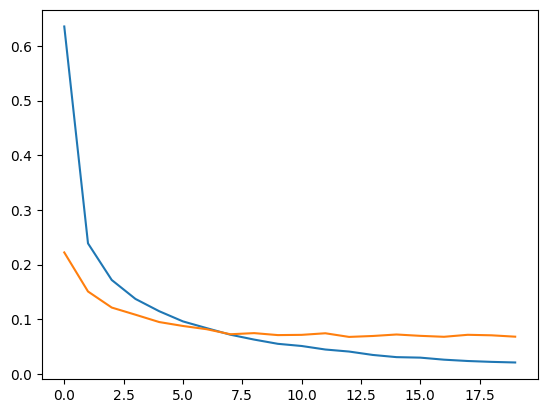

In [ ]:
#Visualising the training loss and validation loss of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#We can see that around 5 epochs, the test and validation losses were around the same.

In [ ]:
#Evaluating the test loss and accuracy of the model.
model.evaluate(x_test, y_test)

#The increase of neurons in the second layer seemed to slightly decreased accuracy and increased loss.

313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9809


[0.06795920431613922, 0.98089998960495]

# **Test 9: Increasing number of layers to 3**

## Task 3: Build a Classifier using MLP
The layer is the most fundamental component of a neural network. Data is put into layers, and they extract representations from it. Choose the number of stacking layers so that model representations should, be useful for the given task.

In [ ]:
#Creating the neural network for the classifier model

#Random seed with key 42 was established for reproducibility.
tf.random.set_seed(42)

#Creating a sequential model using Keras. Sequential model linearly stacks layers one after another.
model = tf.keras.Sequential()

#Adding the input later of the network and indicating that the shape of the data is 28,28/
model.add(tf.keras.layers.Input(shape=[28,28]))

#Flattening the 28,28 2D input into a 1D array of 784.
#The next layer is expecting to receive a 1D array, which is why we need to do this step.
model.add(tf.keras.layers.Flatten())

#Creating 2 dense hidden layers of 128, and using the ReLu activation.
#ReLu was used due to its non-linearity properties and efficiency.
#input shape 784 was from multiplying 28 and 28.
model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))

#Creating a droupout layer to help prevent overfitting
#Dropout 0.25 means that we are dropping out 25% of our input units randomly.
model.add(tf.keras.layers.Dropout(0.25))

#Creating the final output layer, which classifies the images from 0 to 9.
#Softmax activation is used for multiclass classfication and as the output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

'''
The parameters above were chosen by replicating the clothes classification model.
This notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.
'''

'\nThe parameters above were chosen by replicating the clothes classification model.\nThis notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.\n'

In [ ]:
#Showing a summary of the model created.
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               100480    
                                                                 
 dense_40 (Dense)            (None, 128)               16512     
                                                                 
 dense_41 (Dense)            (None, 128)               16512     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 13

## Task 4: Compile the Model
A few more parameters are required before the model can be used for training.

These are added at the build step of the model: Choose these parameters.

Loss function

Optimizer

Metrics

In [ ]:
#Compiling the model by configuring the loss, optimizer, and metrics paramters.
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics=['accuracy'])

#Trying Categorical Crossentropy since this is multi-class classification and the data is encoded. The loss is also on a Logarithmic scale, so the model penalizes confident but incorrect predictions more heavily.
#adam is an extension of SGD and is designed to overcome the limitations of sgd.
# Accuracy was used as a metric to evaluate the model's success.

## Task 5: Train and Test the model.
a. Feed the training data to the built model.

b. Ask model to make predictions about a test set.

c. Verify that the predictions match the labels from the test labels.

In [ ]:
#Training the model with 20 epochs.
#20 epochs will be used across all notebooks for the MNIST dataset for uniformity.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=512)

#A mini batch was selected to make the training less computationally expensive. A batch size of 512 means that we are processing 512 examples from the training dataset.

Epoch 1/20
118/118 [==============================] - 3s 16ms/step - loss: 0.5451 - accuracy: 0.8382 - val_loss: 0.2051 - val_accuracy: 0.9396
Epoch 2/20
118/118 [==============================] - 4s 37ms/step - loss: 0.1893 - accuracy: 0.9445 - val_loss: 0.1360 - val_accuracy: 0.9588
Epoch 3/20
118/118 [==============================] - 2s 21ms/step - loss: 0.1357 - accuracy: 0.9600 - val_loss: 0.1102 - val_accuracy: 0.9647
Epoch 4/20
118/118 [==============================] - 2s 13ms/step - loss: 0.1076 - accuracy: 0.9681 - val_loss: 0.0996 - val_accuracy: 0.9688
Epoch 5/20
118/118 [==============================] - 2s 14ms/step - loss: 0.0858 - accuracy: 0.9748 - val_loss: 0.0931 - val_accuracy: 0.9703
Epoch 6/20
118/118 [==============================] - 2s 14ms/step - loss: 0.0728 - accuracy: 0.9782 - val_loss: 0.0814 - val_accuracy: 0.9759
Epoch 7/20
118/118 [==============================] - 2s 13ms/step - loss: 0.0591 - accuracy: 0.9820 - val_loss: 0.0763 - val_accuracy: 0.9774

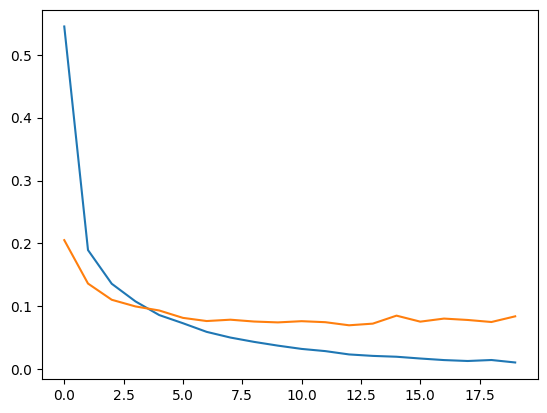

In [ ]:
#Visualising the training loss and validation loss of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#We can see that around 5 epochs, the test and validation losses were around the same.

In [ ]:
#Evaluating the test loss and accuracy of the model.
model.evaluate(x_test, y_test)

#The increase of neurons in the second layer seemed to slightly decreased accuracy and increased loss.

313/313 [==============================] - 1s 2ms/step - loss: 0.0838 - accuracy: 0.9790


[0.08381436765193939, 0.9789999723434448]

# **Test 10: Increasing number of layers to 3 and Increasing Dropout**

## Task 3: Build a Classifier using MLP
The layer is the most fundamental component of a neural network. Data is put into layers, and they extract representations from it. Choose the number of stacking layers so that model representations should, be useful for the given task.

In [ ]:
#Creating the neural network for the classifier model

#Random seed with key 42 was established for reproducibility.
tf.random.set_seed(42)

#Creating a sequential model using Keras. Sequential model linearly stacks layers one after another.
model = tf.keras.Sequential()

#Adding the input later of the network and indicating that the shape of the data is 28,28/
model.add(tf.keras.layers.Input(shape=[28,28]))

#Flattening the 28,28 2D input into a 1D array of 784.
#The next layer is expecting to receive a 1D array, which is why we need to do this step.
model.add(tf.keras.layers.Flatten())

#Creating 2 dense hidden layers of 128, and using the ReLu activation.
#ReLu was used due to its non-linearity properties and efficiency.
#input shape 784 was from multiplying 28 and 28.
model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))

#Creating a droupout layer to help prevent overfitting
#Dropout 0.25 means that we are dropping out 25% of our input units randomly.
model.add(tf.keras.layers.Dropout(0.50))

#Creating the final output layer, which classifies the images from 0 to 9.
#Softmax activation is used for multiclass classfication and as the output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

'''
The parameters above were chosen by replicating the clothes classification model.
This notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.
'''

'\nThe parameters above were chosen by replicating the clothes classification model.\nThis notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.\n'

In [ ]:
#Showing a summary of the model created.
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_43 (Dense)            (None, 128)               100480    
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                                 
 dense_45 (Dense)            (None, 128)               16512     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_46 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 13

## Task 4: Compile the Model
A few more parameters are required before the model can be used for training.

These are added at the build step of the model: Choose these parameters.

Loss function

Optimizer

Metrics

In [ ]:
#Compiling the model by configuring the loss, optimizer, and metrics paramters.
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics=['accuracy'])

#Trying Categorical Crossentropy since this is multi-class classification and the data is encoded. The loss is also on a Logarithmic scale, so the model penalizes confident but incorrect predictions more heavily.
#adam is an extension of SGD and is designed to overcome the limitations of sgd.
# Accuracy was used as a metric to evaluate the model's success.

## Task 5: Train and Test the model.
a. Feed the training data to the built model.

b. Ask model to make predictions about a test set.

c. Verify that the predictions match the labels from the test labels.

In [ ]:
#Training the model with 20 epochs.
#20 epochs will be used across all notebooks for the MNIST dataset for uniformity.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=512)

#A mini batch was selected to make the training less computationally expensive. A batch size of 512 means that we are processing 512 examples from the training dataset.

Epoch 1/20
118/118 [==============================] - 3s 16ms/step - loss: 0.6569 - accuracy: 0.7975 - val_loss: 0.2045 - val_accuracy: 0.9386
Epoch 2/20
118/118 [==============================] - 2s 14ms/step - loss: 0.2204 - accuracy: 0.9372 - val_loss: 0.1439 - val_accuracy: 0.9554
Epoch 3/20
118/118 [==============================] - 2s 13ms/step - loss: 0.1562 - accuracy: 0.9551 - val_loss: 0.1124 - val_accuracy: 0.9645
Epoch 4/20
118/118 [==============================] - 2s 14ms/step - loss: 0.1195 - accuracy: 0.9661 - val_loss: 0.1031 - val_accuracy: 0.9678
Epoch 5/20
118/118 [==============================] - 2s 14ms/step - loss: 0.0990 - accuracy: 0.9709 - val_loss: 0.0941 - val_accuracy: 0.9706
Epoch 6/20
118/118 [==============================] - 2s 19ms/step - loss: 0.0827 - accuracy: 0.9755 - val_loss: 0.0869 - val_accuracy: 0.9733
Epoch 7/20
118/118 [==============================] - 4s 33ms/step - loss: 0.0693 - accuracy: 0.9798 - val_loss: 0.0774 - val_accuracy: 0.9764

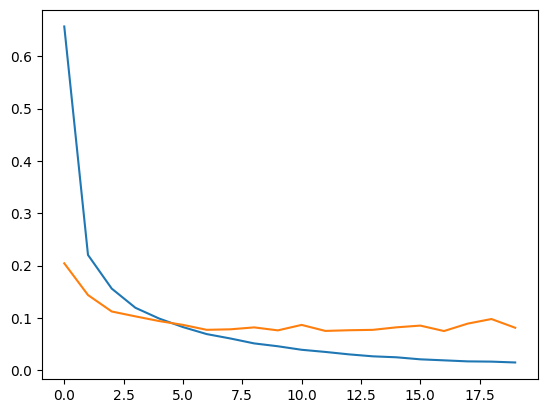

In [ ]:
#Visualising the training loss and validation loss of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#We can see that around 5 epochs, the test and validation losses were around the same.

In [ ]:
#Evaluating the test loss and accuracy of the model.
model.evaluate(x_test, y_test)

#The increase of neurons in the second layer seemed to slightly decreased accuracy and increased loss.

313/313 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.9796


[0.0813920721411705, 0.9796000123023987]